# Classification analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os, glob, random
from scipy import signal
from scipy import io
import json, pickle
import seaborn as sns
from scipy import linalg

# Plot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors as pltcolors
%matplotlib inline
plt.rcParams["font.size"] = 16

import sys
sys.path.append("../../scripts")
from noiseReductionMethodology import preprocessing, Raman_model
from classification import classification_method
from analysis_pclda import LDA_model
from predictFunc import calcPrediction
from util import returnValues

In [2]:
nameList = ["PCA", "NRM"]
colorList = ["gray", "#B51700"]
numList = np.arange(12, 57, 6)
nListStr = np.hstack(["All", numList[::-1]]).astype(str)

condition_color = np.hstack([
    [pltcolors.to_hex(plt.get_cmap("autumn", 4)(i + 1)) for i in range(2)],
    [pltcolors.to_hex("C8")],
    [pltcolors.to_hex(plt.get_cmap("summer", 3)(1 - i)) for i in range(2)],
    [pltcolors.to_hex(plt.get_cmap("Blues", 3)(i + 1)) for i in range(1)],
    [pltcolors.to_hex(a) for a in ["royalblue", "blueviolet", "violet", "sienna"]],
])

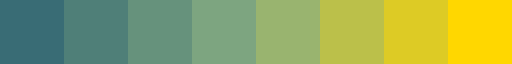

In [3]:
cm_nList = pltcolors.LinearSegmentedColormap.from_list('', ["#396C75", "#89AF82", "gold"], len(numList))
cm_nList

In [4]:
RAMAN = pd.read_csv("../../data/RAMAN_FINGERPRINT_Ecoli.csv")
RAMAN_PROCESSED = preprocessing(RAMAN)

In [5]:
cutRanges = np.arange(60, 100, 0.5)

## SVM

In [6]:
accList_pca_SVM = []
accList_nrm_SVM = []

for i in cutRanges:
    raman_model_ = Raman_model(RAMAN_PROCESSED, cutMode="percent_fixedDim", cutRange=i)
    raman_model_.calcTransformation()

    accList_pca_SVM.append(classification_method(raman_model_.RAMAN_PCA, method="SVMlinear", isPrint=False))
    accList_nrm_SVM.append(classification_method(raman_model_.RAMAN_NRM, method="SVMlinear", isPrint=False))
    
    print(".", end="")
print("")

................................................................................


In [9]:
RESULTS_SVM = pd.DataFrame(np.vstack([np.mean(accList_pca_SVM, axis=1), np.mean(accList_nrm_SVM, axis=1)]).T,
                           columns=["PCA", "NRM"],
                           index=[f"{a:.1f}%" for a in cutRanges])

RESULTS_SVM.to_csv("../../results/ACCLIST_ALLDATA_SVMlinear_PERCENT_fixedDim_Ecoli.csv", index=True)
RESULTS_SVM.head()

,PCA,NRM
60.0%,47.685714,47.685714
60.5%,47.685714,47.685714
61.0%,47.685714,47.685714
61.5%,47.685714,47.685714
62.0%,47.685714,47.685714


## MLP

In [7]:
accList_pca_MLP = []
accList_nrm_MLP = []

for i in cutRanges:
    raman_model_ = Raman_model(RAMAN_PROCESSED, cutMode="percent_fixedDim", cutRange=i)
    raman_model_.calcTransformation()

    accList_pca_MLP.append(classification_method(raman_model_.RAMAN_PCA, method="MLP", isPrint=False))
    accList_nrm_MLP.append(classification_method(raman_model_.RAMAN_NRM, method="MLP", isPrint=False))
    
    print(".", end="")
print("")

................................................................................


In [10]:
RESULTS_MLP = pd.DataFrame(np.vstack([np.mean(accList_pca_SVM, axis=1), np.mean(accList_nrm_SVM, axis=1)]).T,
                           columns=["PCA", "NRM"],
                           index=[f"{a:.1f}%" for a in cutRanges])

RESULTS_MLP.to_csv("../../results/ACCLIST_ALLDATA_MLP_PERCENT_fixedDim_Ecoli.csv", index=True)
RESULTS_MLP.head()

,PCA,NRM
60.0%,47.685714,47.685714
60.5%,47.685714,47.685714
61.0%,47.685714,47.685714
61.5%,47.685714,47.685714
62.0%,47.685714,47.685714


## [SFig. 3f]

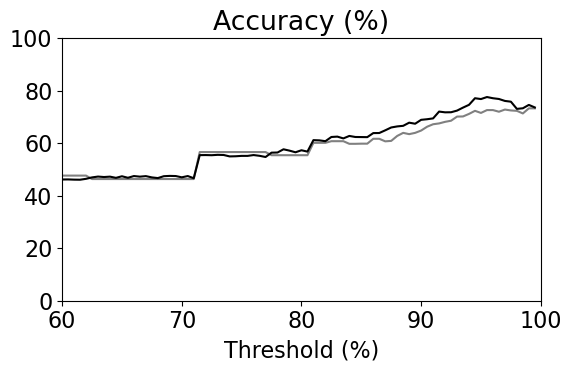

In [12]:
plt.figure(figsize=(6, 4))

for data, name, color in zip([accList_pca_SVM, accList_pca_MLP], ["SVM", "MLP"], ["gray", "k"]):
    plt.plot(cutRanges, np.mean(data, axis=1), color=color, label=name)
    
plt.xticks(np.arange(60, 101, 10))
plt.xlim(60, 100)
plt.xlabel("Threshold (%)")
plt.yticks(np.arange(0, 110, 20))
plt.ylim(0, 100)
plt.title("Accuracy (%)")
plt.tight_layout()
plt.show()